# Assignment on preprocessing

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the dataset into python environment

In [2]:
#Read the dataset

data = pd.read_csv(r'C:\Users\HP\Desktop\Python DSA\assignments\titanic_dataset.csv')

In [3]:
#display first five rows of the data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId',inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
#Check number of rows and columns of the dataset

data.shape

(891, 11)

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#count the null values of the data

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


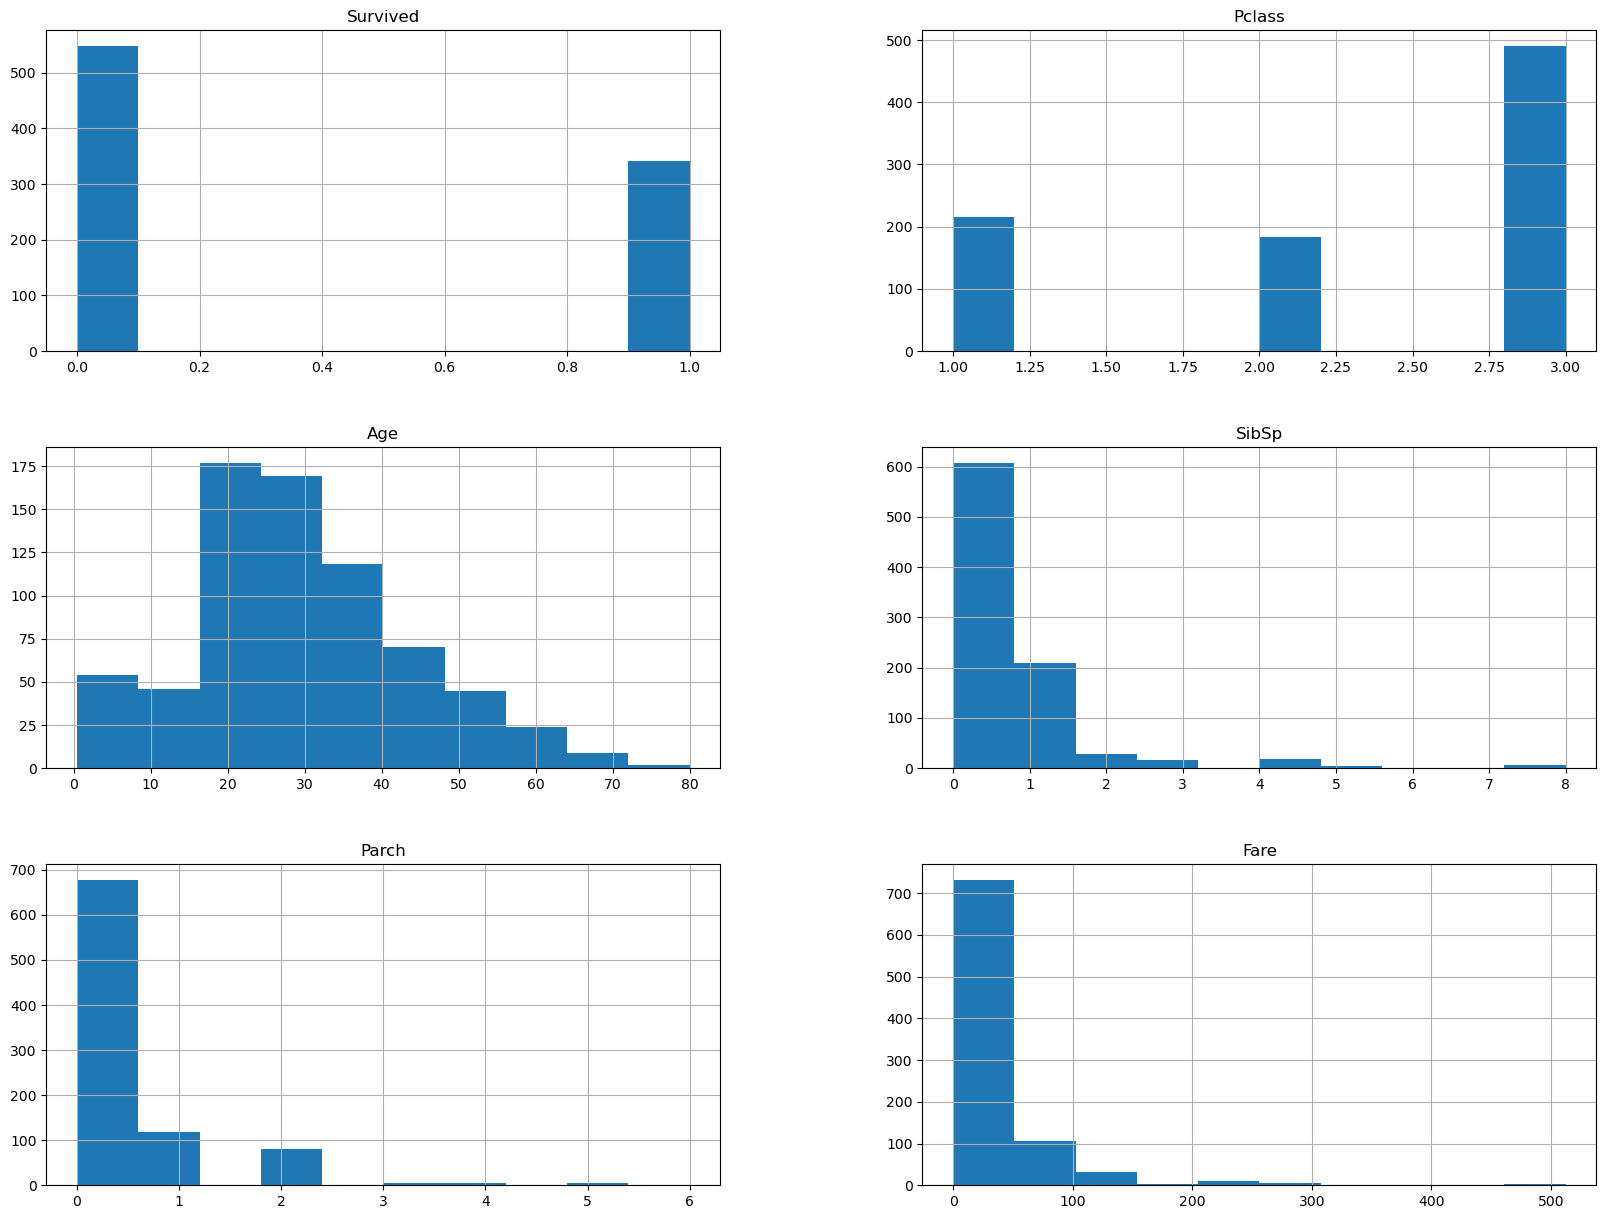

In [10]:
#plot graphs for float and int data types

fregraph = data.select_dtypes(include=['float','int'])
fregraph.hist(figsize=(20,15))
plt.show()

In [11]:
#display the columns of the data

data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#display type of the data

type(data)

pandas.core.frame.DataFrame

# 4. Fill in all the missing values present in all the columns in the dataset

In [13]:
#filling the missing values in the column cabin,embarked with mode

for col in ['Cabin','Embarked']:
    data[col]=data[col].fillna(data[col].mode()[0])

In [14]:
#filling the missing values in the column age with median


data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
#after filling the missing values count the null values of the data

data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


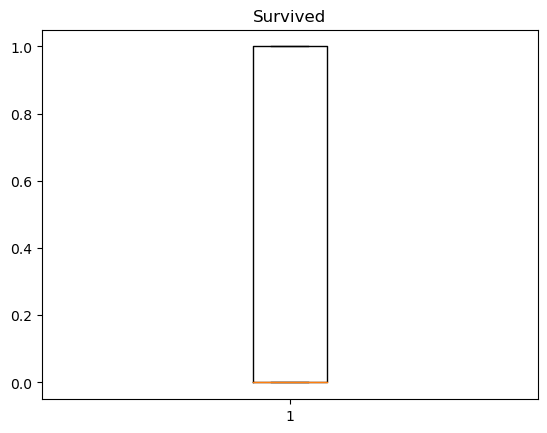

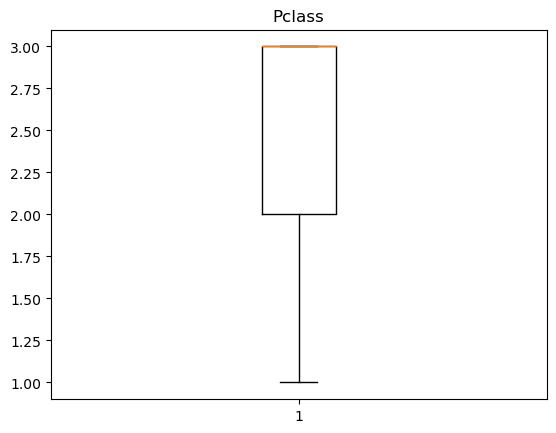

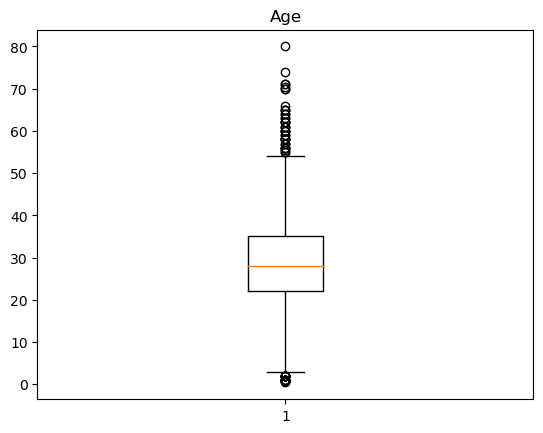

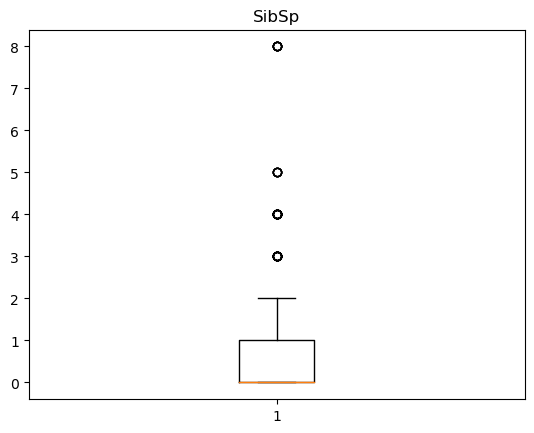

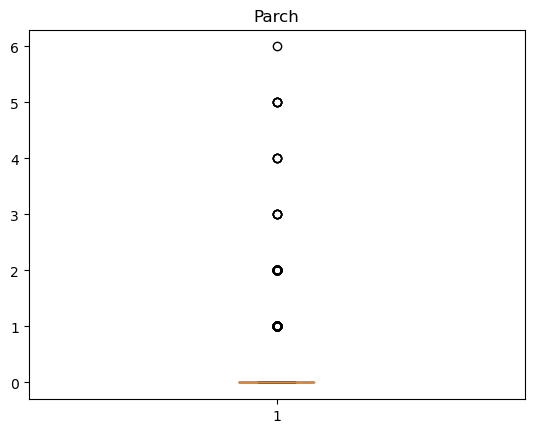

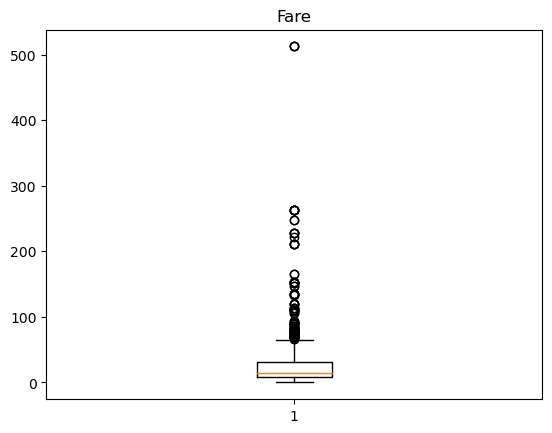

In [17]:
#to check the outliers create boxplots

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [18]:
#finding the quartiles

Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

C:\Users\HP\AppData\Local\Temp\ipykernel_14284\2026538577.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_14284\2026538577.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_14284\2026538577.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'mid

In [19]:
#print the quartiles

print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [20]:
#Calculating interquartile range

IQR = Q3-Q1

In [21]:
#print iqr

print(IQR)

13.0


In [22]:
#setting upper limit & lower limit and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print(up_lim)
print(low_lim)

54.5
2.5


In [24]:
#by using flooring and capping handle the outliers

data['Age'] = np.where(data['Age']>up_lim,up_lim,np.where(data['Age']<low_lim,low_lim,data['Age']))


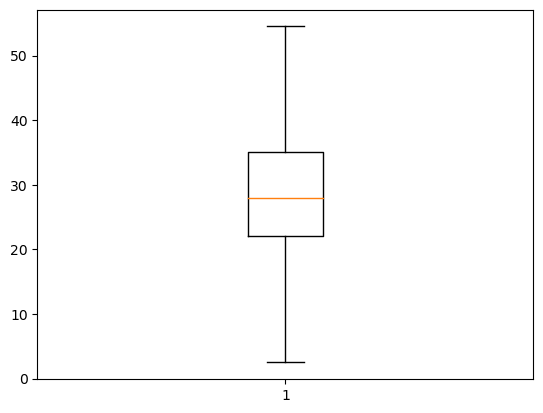

In [25]:
#boxplot with handled outliers

plt.boxplot(data['Age'])
plt.show()

In [26]:
#finding the quartiles

Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')

C:\Users\HP\AppData\Local\Temp\ipykernel_14284\1098823506.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_14284\1098823506.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_14284\1098823506.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [27]:
#print the quartiles

print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [28]:
#Calculating interquartile range

IQR = Q3-Q1

In [29]:
#print iqr

IQR

1.0

In [30]:
#setting upper limit & lower limit and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print(up_lim)
print(low_lim)

2.5
-1.5


In [31]:
#by using flooring and capping handle the outliers

data['SibSp'] = np.where(data['SibSp']>up_lim,up_lim,np.where(data['SibSp']<low_lim,low_lim,data['SibSp']))

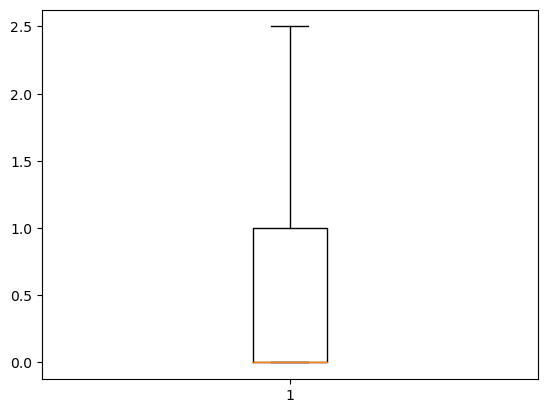

In [32]:
#boxplot with handled outliers

plt.boxplot(data['SibSp'])
plt.show()

In [33]:
#finding the quartiles

Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

C:\Users\HP\AppData\Local\Temp\ipykernel_14284\2263732042.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_14284\2263732042.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_14284\2263732042.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'm

In [34]:
#print the quartiles

print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [35]:
#Calculating interquartile range and print iqr

IQR = Q3-Q1
IQR

23.0896

In [36]:
#setting upper limit & lower limit and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print(up_lim)
print(low_lim)

65.6344
-26.724


In [38]:
#by using flooring and capping handle the outliers

data['Fare'] = np.where(data['Fare']>up_lim,up_lim,np.where(data['Fare']<low_lim,low_lim,data['Fare']))

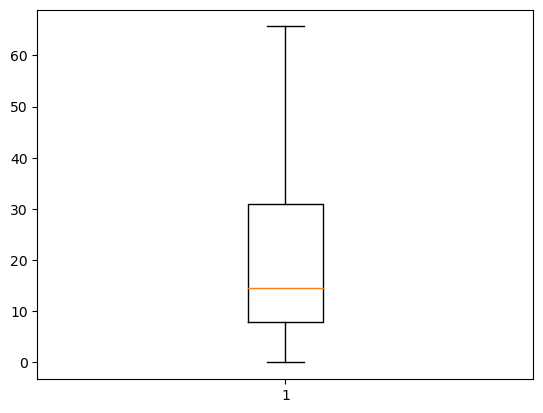

In [39]:
#boxplot with handled outliers

plt.boxplot(data['Fare'])
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [40]:
#separate feature set X and target variable Y

X = data.drop('Survived',axis=1)
Y = data['Survived']

In [41]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.836071,12.072074,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


In [42]:
#drop categorical columns.

X1 = X.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [43]:
#display first five rows 

X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0,7.2500
2,1,38.0,1.0,0,65.6344
3,3,26.0,0.0,0,7.9250
4,1,35.0,1.0,0,53.1000
5,3,35.0,0.0,0,8.0500


In [44]:
#import the minmaxscaler

from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max = MinMaxScaler()

In [46]:
#fit and transform

X1 = min_max.fit_transform(X1)

In [47]:
#type of the transformed data

type(X1)

numpy.ndarray

In [48]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
#transform numpy array into a dataframe

X1 = pd.DataFrame(X1,columns=['Pclass','Age', 'SibSp','Parch','Fare'])

In [50]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375
std,0.418036,0.232155,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000
